In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
#importing Dataset

data = pd.read_csv(r'C:\Users\Slim5pro-LXIN\Desktop\python_folder\EXE-02\dataset.csv')

In [52]:
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
5,906539,B,11.57,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,...,13.07,26.98,86.43,520.5,0.1249,0.1937,0.25600,0.06664,0.3035,0.08284
6,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,12.48,37.16,82.28,474.2,0.1298,0.2517,0.36300,0.09653,0.2112,0.08732
7,87880,M,13.81,23.75,91.56,597.8,0.13230,0.17680,0.15580,0.09176,...,19.20,41.85,128.50,1153.0,0.2226,0.5209,0.46460,0.20130,0.4432,0.10860
8,862989,B,10.49,19.29,67.41,336.1,0.09989,0.08578,0.02995,0.01201,...,11.54,23.31,74.22,402.8,0.1219,0.1486,0.07987,0.03203,0.2826,0.07552
9,89827,B,11.06,14.96,71.49,373.9,0.10330,0.09097,0.05397,0.03341,...,11.92,19.90,79.76,440.0,0.1418,0.2210,0.22990,0.10750,0.3301,0.09080


In [53]:
data.tail(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
559,9110944,B,14.80,17.66,95.88,674.8,0.09179,0.08890,0.04069,0.02260,...,16.43,22.74,105.90,829.5,0.1226,0.1881,0.20600,0.08308,0.3600,0.07285
560,854268,M,14.25,21.72,93.63,633.0,0.09823,0.10980,0.13190,0.05598,...,15.89,30.36,116.20,799.6,0.1446,0.4238,0.51860,0.14470,0.3591,0.10140
561,89511501,B,12.20,15.21,78.01,457.9,0.08673,0.06545,0.01994,0.01692,...,13.75,21.38,91.11,583.1,0.1256,0.1928,0.11670,0.05556,0.2661,0.07961
562,9113156,B,14.40,26.99,92.25,646.1,0.06995,0.05223,0.03476,0.01737,...,15.40,31.98,100.40,734.6,0.1017,0.1460,0.14720,0.05563,0.2345,0.06464
563,894855,B,12.86,13.32,82.82,504.8,0.11340,0.08834,0.03800,0.03400,...,14.04,21.08,92.80,599.5,0.1547,0.2231,0.17910,0.11550,0.2382,0.08553
564,911320502,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,873885,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,911201,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810
568,9012795,M,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,...,22.69,21.84,152.10,1535.0,0.1192,0.2840,0.40240,0.19660,0.2730,0.08666


###### EDA

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [55]:
#Checking for misssing values

data.isna().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [56]:
#checking no of unique rows in each feature
data.nunique().sort_values()

diagnosis              2
smoothness_worst     411
symmetry_mean        432
radius_mean          456
radius_worst         457
smoothness_mean      474
texture_mean         479
points_worst         492
symmetry_se          498
dimension_mean       499
symmetry_worst       500
points_se            507
texture_worst        511
perimeter_worst      514
texture_se           519
perimeter_mean       522
area_se              528
compactness_worst    529
perimeter_se         533
concavity_se         533
dimension_worst      535
concavity_mean       537
compactness_mean     537
concavity_worst      539
area_mean            539
radius_se            540
compactness_se       541
points_mean          542
area_worst           544
dimension_se         545
smoothness_se        547
id                   569
dtype: int64

In [57]:
col = data.columns
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')


In [58]:
n = data.diagnosis
B, M = n.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

Number of Benign:  357
Number of Malignant :  212


In [59]:
px.histogram(data_frame=data, x='diagnosis', color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [60]:
m = data.drop("diagnosis", axis=1)

In [61]:
m.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [62]:
#dropping redundant column
data.drop('id', axis=1, inplace=True)

In [63]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

Visualizing the numerical features reveal lot of information about the dataset

In [64]:
px.histogram(data_frame=data,x=data.area_mean,color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [65]:
px.histogram(data_frame=data,x='radius_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [66]:
px.histogram(data_frame=data,x='perimeter_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [67]:
px.histogram(data_frame=data,x='smoothness_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [68]:
px.histogram(data_frame=data,x='texture_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [69]:
px.scatter(data_frame=data,x='symmetry_worst',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [70]:
px.scatter(data_frame=data,x='concavity_worst',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [71]:
px.scatter(data_frame=data,x='dimension_worst',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

There are many outliers present in the dataset.

In [73]:
data1 = data.copy()

In [74]:
#Removal of outlier:

data = data1.copy()

for i in [i for i in data.columns]:
    if data[i].nunique()>=12:
        Q1 = data[i].quantile(0.15)
        Q3 = data[i].quantile(0.85)
        IQR = Q3 - Q1
        data = data[data[i] <= (Q3+(1.5*IQR))]
        data = data[data[i] >= (Q1-(1.5*IQR))]
data = data.reset_index(drop=True)
display(data.head())
print('\n\033[1mInference:\033[0m Before removal of outliers, The dataset had {} samples.'.format(data1.shape[0]))
print('\033[1mInference:\033[0m After removal of outliers, The dataset now has {} samples.'.format(data.shape[0]))

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766



Inference: Before removal of outliers, The dataset had 569 samples.
Inference: After removal of outliers, The dataset now has 502 samples.


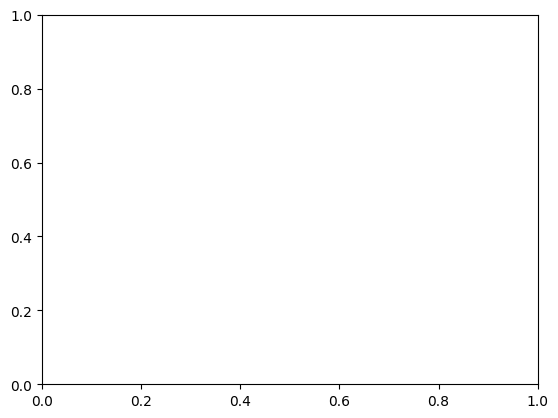

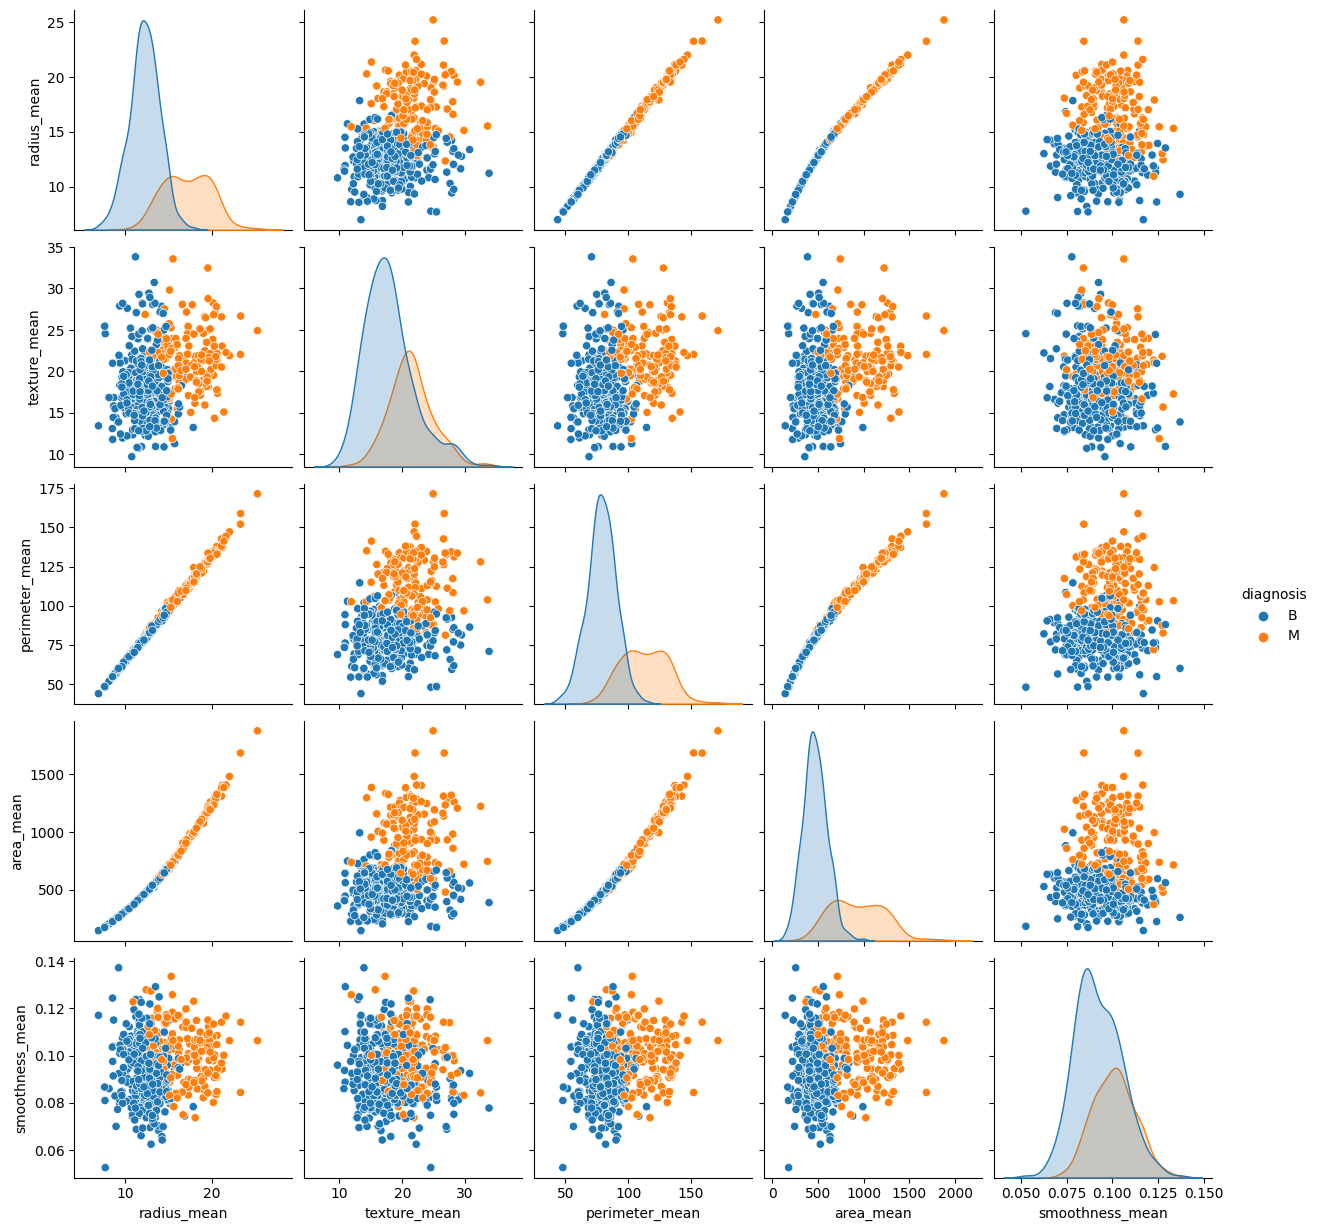

In [75]:
sns.pairplot(data, hue="diagnosis", vars=["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean"])
plt.show()

The data is somewhat normally distributed.

The data samples of most of the features do show some patterns. Also they seem to have lot of overlap for the outcome classes, making it difficult to be distingusihable.

In [76]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(m.corr(), annot=True,linewidths=.5, fmt= '.1f',ax=ax)

<AxesSubplot: >

Correlation plt between the variables convey lot of information about the relationship betweem them. There seems to be strong multicollinearity in the dataset.

###### Preparing Data for ML

We need to convert the diagnostic values to numerical values in order to process it.

In [77]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
data.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
5,0,11.57,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,0.2031,...,13.07,26.98,86.43,520.5,0.1249,0.1937,0.25600,0.06664,0.3035,0.08284
6,0,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,...,12.48,37.16,82.28,474.2,0.1298,0.2517,0.36300,0.09653,0.2112,0.08732
7,0,10.49,19.29,67.41,336.1,0.09989,0.08578,0.02995,0.01201,0.2217,...,11.54,23.31,74.22,402.8,0.1219,0.1486,0.07987,0.03203,0.2826,0.07552
8,0,11.06,14.96,71.49,373.9,0.10330,0.09097,0.05397,0.03341,0.1776,...,11.92,19.90,79.76,440.0,0.1418,0.2210,0.22990,0.10750,0.3301,0.09080
9,1,20.59,21.24,137.80,1320.0,0.10850,0.16440,0.21880,0.11210,0.1848,...,23.86,30.76,163.20,1760.0,0.1464,0.3597,0.51790,0.21130,0.2480,0.08999


Normalizing all values before creating train-test split

In [78]:
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)
x = (x_data - np.min(x_data)) / (np.max(x_data)-np.min(x_data))
x.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,0.292724,0.111203,0.274528,0.184837,0.593939,0.191153,0.113171,0.200542,0.502538,0.321812,...,0.252379,0.096482,0.226672,0.149765,0.522116,0.127444,0.137481,0.323493,0.370186,0.158448
1,0.198421,0.383402,0.199593,0.116979,0.523855,0.361307,0.181294,0.143198,0.479061,0.501678,...,0.178976,0.291045,0.172794,0.098609,0.365253,0.299939,0.212088,0.273028,0.407703,0.261884
2,0.222545,0.295436,0.212434,0.132430,0.651947,0.222349,0.086460,0.134417,0.347081,0.451007,...,0.202990,0.384328,0.183024,0.117787,0.507524,0.157275,0.118109,0.255977,0.426959,0.299151
3,0.235704,0.152697,0.228721,0.139118,0.754943,0.357137,0.131564,0.259946,0.383249,0.361074,...,0.180788,0.099947,0.161944,0.102395,0.505700,0.204232,0.095960,0.296624,0.129482,0.160096
4,0.450079,0.145228,0.421737,0.327645,0.319640,0.189372,0.096310,0.144011,0.351523,0.183893,...,0.374717,0.098881,0.335359,0.260886,0.285910,0.192493,0.150764,0.281709,0.257304,0.157815
5,0.251604,0.387137,0.238118,0.153474,0.388659,0.219240,0.155691,0.077398,0.548223,0.426510,...,0.232895,0.398721,0.223324,0.137995,0.398085,0.220114,0.283374,0.229556,0.439243,0.350235
6,0.248314,0.590041,0.240623,0.149899,0.473304,0.313547,0.315640,0.222493,0.140228,0.528188,...,0.206162,0.670043,0.197594,0.118940,0.442772,0.300215,0.401815,0.332518,0.132802,0.407022
7,0.192390,0.397510,0.184950,0.111041,0.559489,0.251687,0.085013,0.065095,0.666244,0.498322,...,0.163570,0.300906,0.147622,0.089555,0.370725,0.157828,0.088410,0.110334,0.369854,0.257447
8,0.223642,0.217842,0.216898,0.132834,0.599858,0.271359,0.153193,0.181084,0.386421,0.641275,...,0.180788,0.210021,0.181970,0.104865,0.552212,0.257817,0.254483,0.370307,0.527556,0.451134
9,0.746148,0.478423,0.736121,0.678293,0.661418,0.549693,0.621062,0.607588,0.432107,0.411409,...,0.721794,0.499467,0.699299,0.648119,0.594163,0.449370,0.573279,0.727868,0.254980,0.440867


###### Creating train-test split

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=42)

###### Decision Tree Classifier

In [80]:
dt = DecisionTreeClassifier(random_state = 1)  #Building the model
dt.fit(x_train,y_train)                        #Training our model
print("Accuracy of Decision Tree Classifier : ",dt.score(x_test,y_test))
dt_acc_score = dt.score(x_test,y_test)

Accuracy of Decision Tree Classifier :  0.9139072847682119


Our model has an accuracy rate of 0.91 

We can use confusion matrix to see which parts it got wrong in predicting.

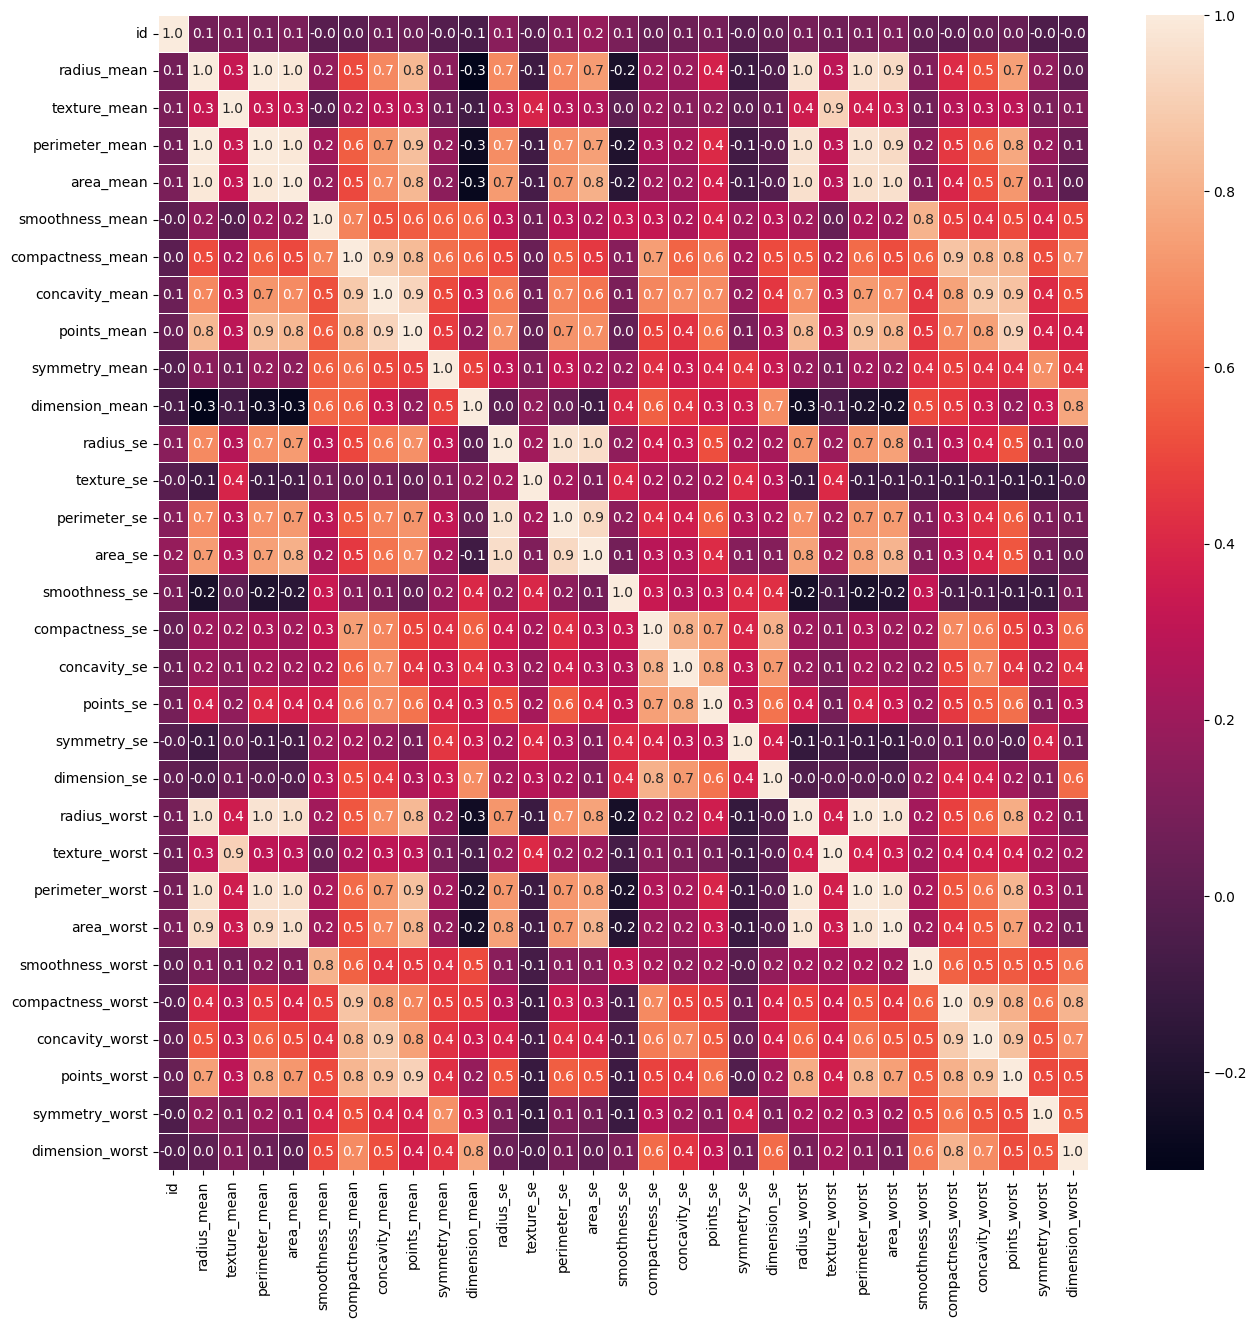

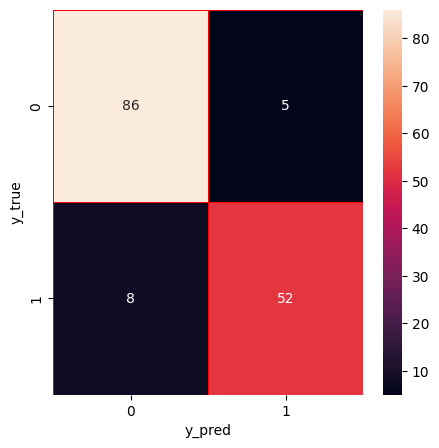

In [81]:
y_pred = dt.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True, linewidths=0.5, linecolor="red", fmt =".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

###### Random Forest Classifier

In [82]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)      #Building the model
rf.fit(x_train,y_train)                                           #Training the model
print("Accuracy of Random Forest Classifier : ", rf.score(x_test,y_test))
rf_acc_score = rf.score(x_test,y_test)

Accuracy of Random Forest Classifier :  0.9403973509933775


Our model has an accuracy rate of 0.94

Using Confusion matrix to see which parts it got wrong in predicting.

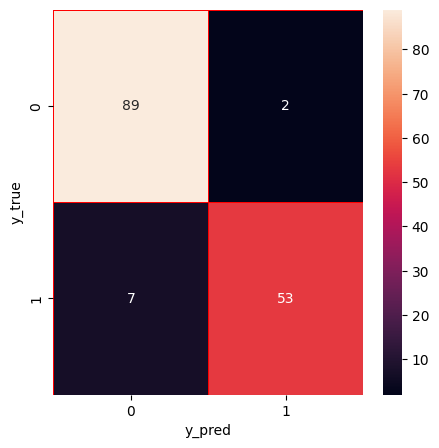

In [83]:
y_pred = rf.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

###### KNN Classifier

In [84]:
knn = KNeighborsClassifier(n_neighbors=10)   #Building the model
knn.fit(x_train,y_train)                     #Training the model
print("Accuracy of K Nerighbors Classifier : ", knn.score(x_test,y_test))
knn_acc_score = knn.score(x_test,y_test)

Accuracy of K Nerighbors Classifier :  0.9403973509933775


We can create a loop to find the best value of K


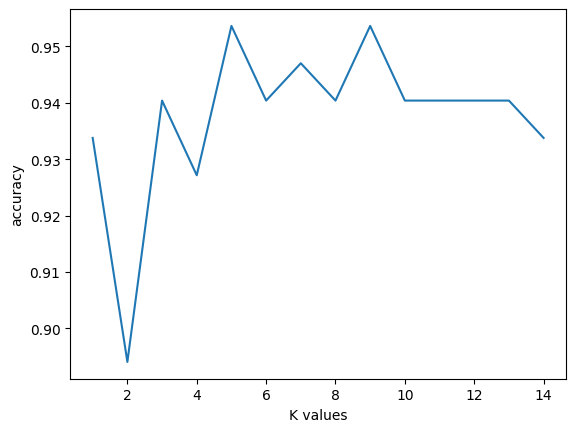

In [85]:
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
    
#visualize
plt.plot(range(1,15), score_list)
plt.xlabel("K values")
plt.ylabel("accuracy")
plt.savefig("plot")
plt.show()

We can observe that the best value of K is either 6 or 10

In [86]:
knn = KNeighborsClassifier(n_neighbors=6)   #Building the model
knn.fit(x_train,y_train)                    #Training the model
print("Test accuracy : ", knn.score(x_test,y_test))

Test accuracy :  0.9403973509933775


Our model has same accuracy rate of 0.94, when k = 6 or 10


Confusion Matrix -

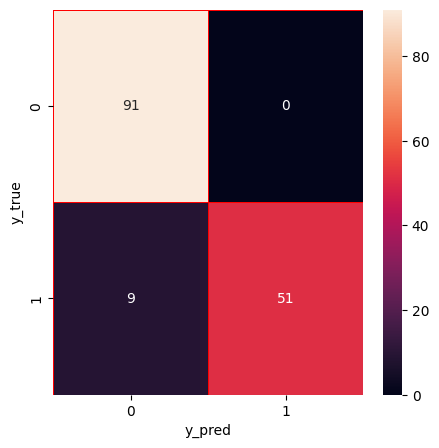

In [87]:
y_pred = knn.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

###### Model Evaluation

In [88]:
model_eval = pd.DataFrame({'Model': ['K-Nearest Neighbour','Decision Tree','Random Forest'], 
                         'Accuracy': [knn_acc_score*100,dt_acc_score*100,rf_acc_score*100]})
model_eval

,Model,Accuracy
0,K-Nearest Neighbour,94.039735
1,Decision Tree,91.390728
2,Random Forest,94.039735


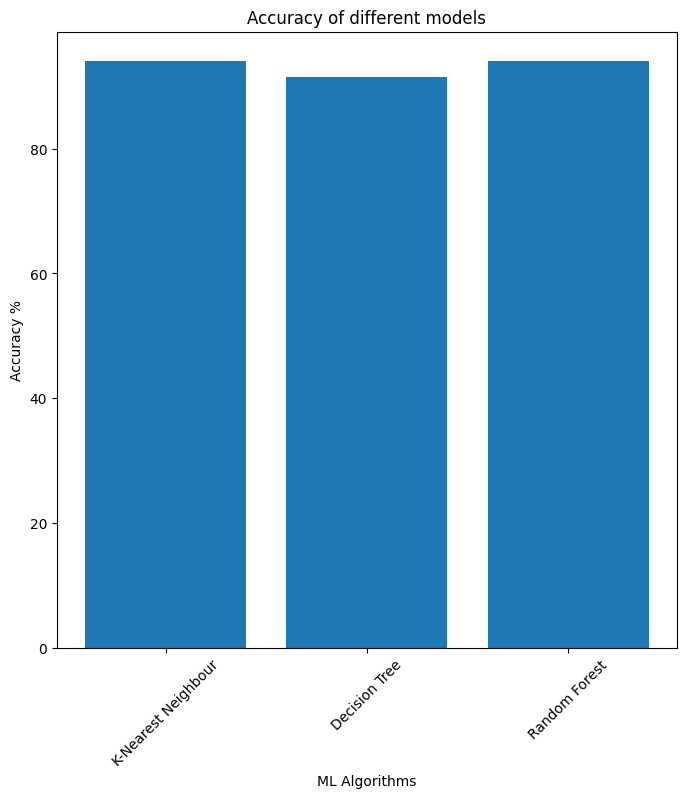

In [89]:
#Visualize
plt.figure(figsize=(8,8))
plt.title("Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("ML Algorithms")
plt.xticks(rotation=45)
plt.bar(model_eval['Model'],model_eval['Accuracy'])
plt.show()

We conclude that the diagnosis of breast cancer can best be made with the random forest & KNN algorithm, which has same accuracy predictions rate of 94 percent.